In [1]:
# importing packages and other items used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import display_html, HTML
%matplotlib inline

In [2]:
# allows tables to be printed side by side.. i.e. comparing between LHP/RHP
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table', 
            'table style="display:inline"'),raw=True)

In [3]:
# assigning CSV files to functions
averageLHP=pd.read_csv("MLB_vs_LHP_2017")
averageRHP=pd.read_csv("MLB_vs_RHP_2017")

In [4]:
# removing non-needed keys from table
teamsAVGvsLHP = averageLHP[['TEAM', 'AVG', 'OBP', 'SLG']]
teamsAVGvsRHP = averageRHP[['TEAM', 'AVG', 'OBP', 'SLG']]

In [5]:
# Displays League AVG by Team/Rank against RHP
averageRHP

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,HOU,162,4185,684,1185,266,14,179,2016,654,0.283,0.345,0.482,0.827
1,2,NYY,162,4146,660,1093,202,16,185,1882,634,0.264,0.341,0.454,0.795
2,3,WAS,162,4326,650,1139,241,23,170,1936,631,0.263,0.332,0.448,0.780
3,4,CHI,161,4115,622,1038,218,20,172,1812,594,0.252,0.334,0.440,0.774
4,5,BOS,162,4435,617,1132,231,15,137,1804,577,0.255,0.323,0.407,0.729
5,6,TEX,162,4096,615,995,194,16,188,1785,580,0.243,0.318,0.436,0.754
6,7,ARI,160,4039,610,1044,237,31,162,1829,583,0.258,0.334,0.453,0.787
7,8,STL,161,4291,601,1104,228,20,146,1810,575,0.257,0.333,0.422,0.755
8,9,MIA,160,4229,601,1134,206,22,160,1864,575,0.268,0.332,0.441,0.772
9,10,MIN,161,3955,591,1028,199,23,159,1750,563,0.260,0.335,0.442,0.777


In [6]:
# Displays League AVG by Team/Rank against LHP
averageLHP

,RK,TEAM,GP,AB,R,H,2B,3B,HR,TB,RBI,AVG,OBP,SLG,OPS
0,1,CLE,140,1926,280,520,106,7,71,853,267,0.270,0.351,0.443,0.794
1,2,COL,129,1554,241,436,89,10,62,731,232,0.281,0.344,0.470,0.814
2,3,LAD,133,1571,227,398,97,6,65,702,222,0.253,0.342,0.447,0.789
3,4,MIN,132,1602,224,416,87,8,47,660,218,0.260,0.332,0.412,0.744
4,5,HOU,117,1426,212,396,80,6,59,665,200,0.278,0.348,0.466,0.814
5,6,ARI,130,1486,202,361,77,8,58,628,193,0.243,0.317,0.423,0.739
6,7,CWS,122,1457,200,408,71,13,45,640,192,0.280,0.333,0.439,0.773
7,8,CHI,133,1381,200,364,56,9,51,591,191,0.264,0.349,0.428,0.777
8,9,NYY,128,1448,198,370,64,7,56,616,187,0.256,0.332,0.425,0.757
9,10,DET,98,1213,187,341,69,8,57,597,182,0.281,0.345,0.492,0.837


In [7]:
display_side_by_side(teamsAVGvsRHP, teamsAVGvsLHP)

,TEAM,AVG,OBP,SLG
0,HOU,0.283,0.345,0.482
1,NYY,0.264,0.341,0.454
2,WAS,0.263,0.332,0.448
3,CHI,0.252,0.334,0.440
4,BOS,0.255,0.323,0.407
5,TEX,0.243,0.318,0.436
6,ARI,0.258,0.334,0.453
7,STL,0.257,0.333,0.422
8,MIA,0.268,0.332,0.441
9,MIN,0.260,0.335,0.442


In [8]:
# displays the league averages against LHP/RHP in a side by side view
display_side_by_side(teamsAVGvsRHP.describe(), teamsAVGvsLHP.describe())

,AVG,OBP,SLG
count,30.000000,30.000000,30.000000
mean,0.254867,0.323800,0.428600
std,0.009839,0.010867,0.021758
min,0.236000,0.301000,0.384000
25%,0.248000,0.318000,0.413750
50%,0.255500,0.323000,0.433000
75%,0.260750,0.332750,0.440750
max,0.283000,0.345000,0.482000
,AVG,OBP,SLG
count,30.000000,30.000000,30.000000


In [9]:
# setting league average for each option based off of table
leagueAVGRHP = 0.254867
leagueAVGLHP = 0.255

<BarContainer object of 30 artists>

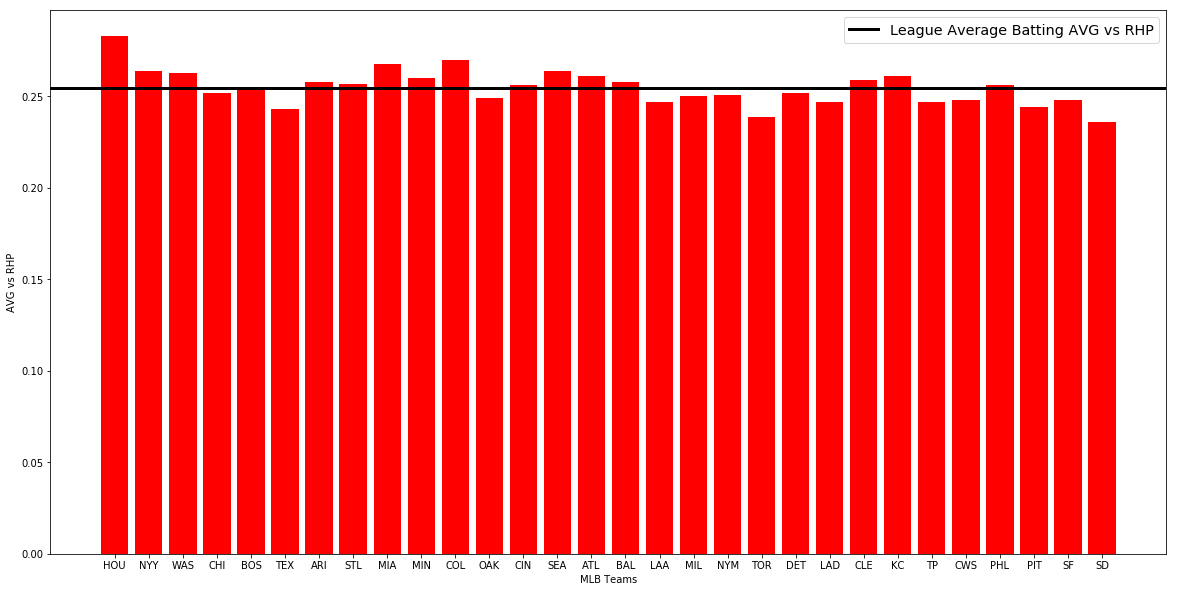

In [10]:
# creates BAR GRAPH for averages against RHP
plt.figure(figsize=(20, 10))
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs RHP')
plt.axhline(leagueAVGRHP, color='k', lw='3', ls='-',
           label='League Average Batting AVG vs RHP')
plt.legend(fontsize='x-large')
plt.bar(teamsAVGvsRHP['TEAM'], teamsAVGvsRHP['AVG'], color='r', label='Teams Batting AVG')

<BarContainer object of 30 artists>

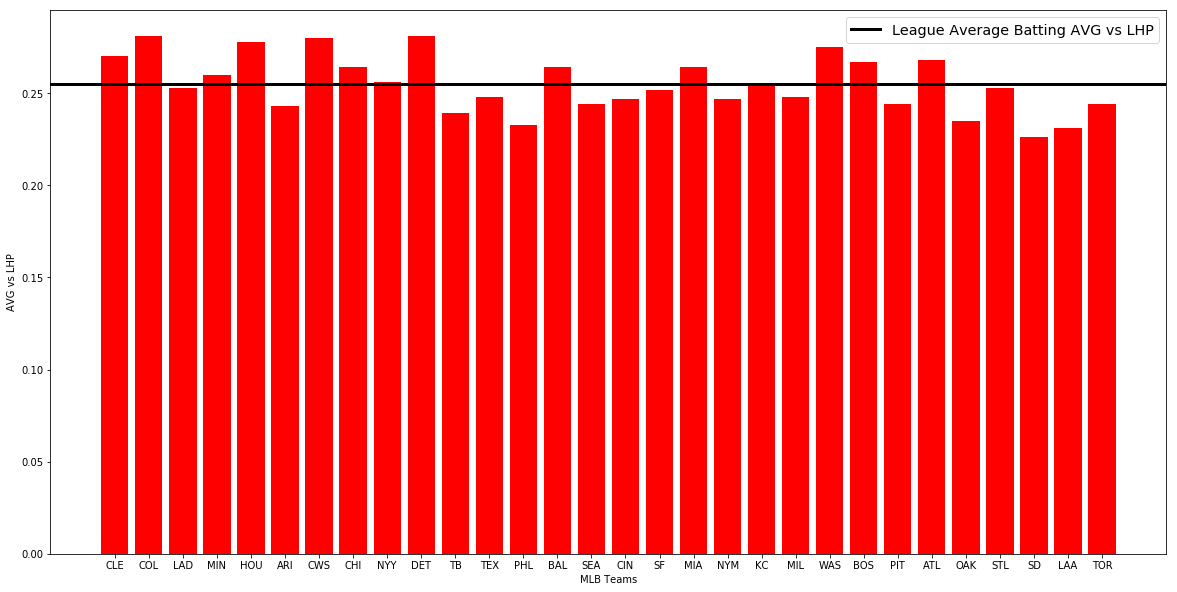

In [11]:
# creates BAR GRAPH for averages against LHP  
plt.figure(figsize=(20, 10))
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs LHP')
plt.axhline(leagueAVGLHP, color='k', lw='3', ls='-',
           label='League Average Batting AVG vs LHP')
plt.legend(fontsize='x-large')

plt.bar(teamsAVGvsLHP['TEAM'], teamsAVGvsLHP['AVG'], color='r', label='Teams Batting AVG')

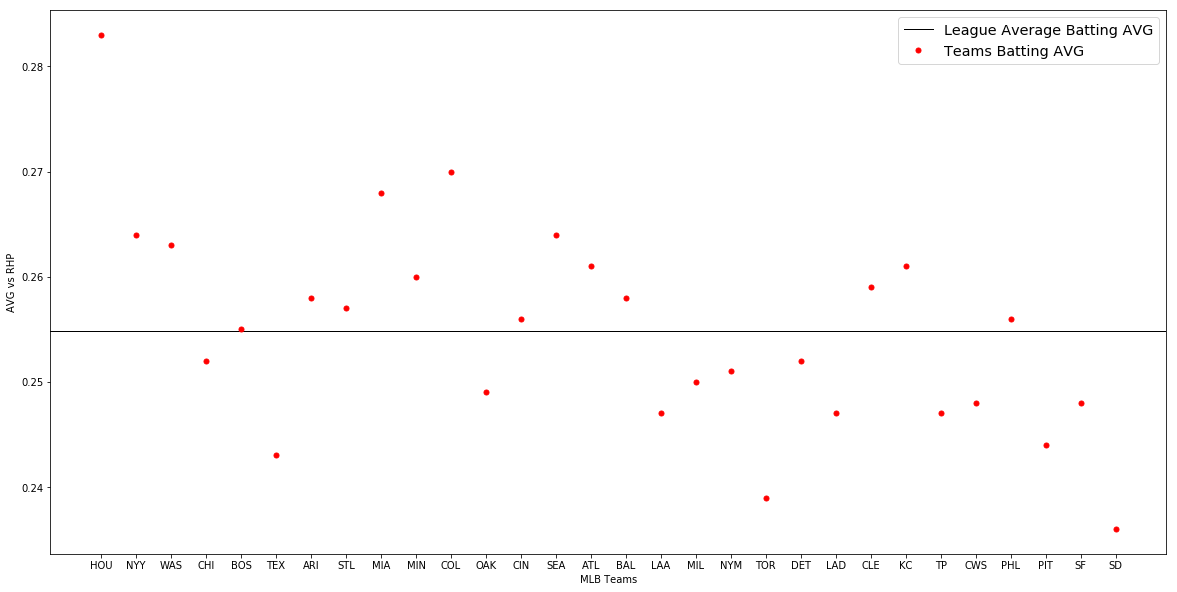

In [12]:
# plots the data showing eachs teams batting avg against RHP, compared to the median line of the league
plt.figure(figsize=(20, 10))
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs RHP')
plt.axhline(leagueAVGRHP, color='k', lw='1', ls='-',
           label='League Average Batting AVG')
plt.plot(teamsAVGvsRHP['TEAM'], teamsAVGvsRHP['AVG'], "r.",
         markersize=10, label='Teams Batting AVG')
plt.legend(fontsize='x-large')
plt.show()

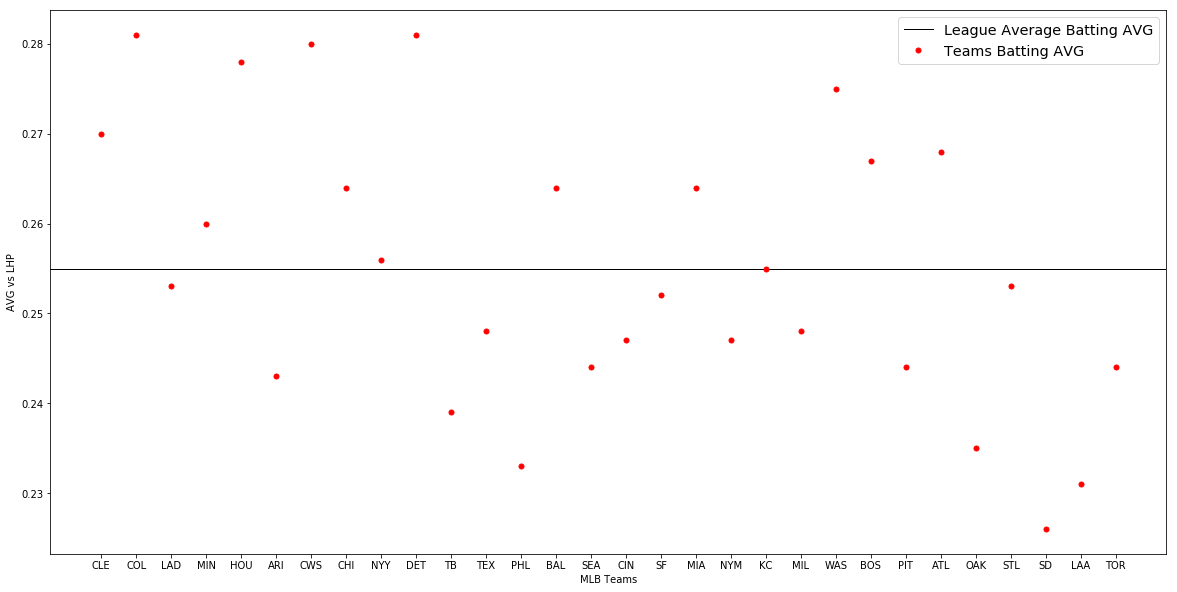

In [13]:
# plots the data showing eachs teams batting avg against LHP, compared to the median line of the league
plt.figure(figsize=(20,10))
plt.xlabel('MLB Teams')
plt.ylabel('AVG vs LHP')
plt.axhline(leagueAVGLHP, color='k', lw='1', ls='-', 
            label='League Average Batting AVG')
plt.plot(teamsAVGvsLHP['TEAM'], teamsAVGvsLHP['AVG'], 'r.',
        markersize=10, label='Teams Batting AVG')
plt.legend(fontsize='x-large')
plt.show()